In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

read_file = pd.read_excel('C:/Users/HP/Desktop/Churn Prediction/customer churn data_usecase2_Hackathon.xlsx')
read_file.to_csv("BankData.csv",index = None)
df1 = pd.read_csv("BankData.csv")
df1.head(5)

,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category,Recommendation
0,5522-JBWMO,Male,0,No,Yes,1.0,Yes,No,general loan,No,No,No,No,No,No,Month-to-month,No,44.0,44,No,My Credit Card is not generating OTP.,Credit Card,NaN
1,5275-PMFUT,Male,0,Yes,Yes,72.0,No,No,general loan,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,64.8,4719.75,No,The Current Account charges are too high.,Current Account,NaN
2,5609-CEBID,Female,1,No,No,20.0,Yes,Yes,top up loan,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,94.1,1782.4,Yes,The loan prepayment charges are too high.,Loans,NaN
3,4381-MHQDC,Female,0,No,No,47.0,Yes,Yes,general loan,Yes,No,Yes,Yes,No,No,Two year,Yes,65.0,2879.9,No,The Savings Account opening process was very s...,Savings Account,NaN
4,6353-BRMMA,Female,0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,104.1,5645.8,No,The loan documentation process is very complic...,Loans,NaN


In [272]:
df = df1
df.head()

,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category,Recommendation
0,5522-JBWMO,Male,0,No,Yes,1.0,Yes,No,general loan,No,No,No,No,No,No,Month-to-month,No,44.0,44,No,My Credit Card is not generating OTP.,Credit Card,NaN
1,5275-PMFUT,Male,0,Yes,Yes,72.0,No,No,general loan,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,64.8,4719.75,No,The Current Account charges are too high.,Current Account,NaN
2,5609-CEBID,Female,1,No,No,20.0,Yes,Yes,top up loan,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,94.1,1782.4,Yes,The loan prepayment charges are too high.,Loans,NaN
3,4381-MHQDC,Female,0,No,No,47.0,Yes,Yes,general loan,Yes,No,Yes,Yes,No,No,Two year,Yes,65.0,2879.9,No,The Savings Account opening process was very s...,Savings Account,NaN
4,6353-BRMMA,Female,0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,104.1,5645.8,No,The loan documentation process is very complic...,Loans,NaN


In [273]:
df.dtypes

customerID                        object
Gender                            object
Senior Citizen                     int64
Marital Status                    object
Dependents                        object
tenure in months                 float64
Priority Account                  object
Credit Cards                      object
Loan Account                      object
Netbanking                        object
Debit Card                        object
MobileApp                         object
TechSupport Availed               object
Zero Balance Account              object
FDs                               object
Interest Deposited                object
Paperless Banking                 object
Monthly Average Balance (USD)    float64
Yearly Average Balance (USD)      object
Churn                             object
Customer Feedback                 object
Category                          object
Recommendation                   float64
dtype: object

In [274]:
df.shape

(999, 23)

In [275]:
df.isnull().sum()

customerID                         0
Gender                             0
Senior Citizen                     0
Marital Status                     0
Dependents                         2
tenure in months                   5
Priority Account                   2
Credit Cards                       2
Loan Account                       1
Netbanking                         1
Debit Card                         0
MobileApp                          0
TechSupport Availed                1
Zero Balance Account               2
FDs                                4
Interest Deposited                 0
Paperless Banking                  2
Monthly Average Balance (USD)      4
Yearly Average Balance (USD)       4
Churn                             16
Customer Feedback                  0
Category                          27
Recommendation                   999
dtype: int64

In [276]:
df.nunique()

customerID                       999
Gender                             2
Senior Citizen                     2
Marital Status                     2
Dependents                         2
tenure in months                  73
Priority Account                   2
Credit Cards                       2
Loan Account                       3
Netbanking                         2
Debit Card                         2
MobileApp                          2
TechSupport Availed                2
Zero Balance Account               2
FDs                                2
Interest Deposited                 3
Paperless Banking                  2
Monthly Average Balance (USD)    655
Yearly Average Balance (USD)     980
Churn                              2
Customer Feedback                374
Category                          16
Recommendation                     0
dtype: int64

In [277]:
df = df.drop(["customerID","Recommendation"], axis = 1)
df.head(5)

,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category
0,Male,0,No,Yes,1.0,Yes,No,general loan,No,No,No,No,No,No,Month-to-month,No,44.0,44,No,My Credit Card is not generating OTP.,Credit Card
1,Male,0,Yes,Yes,72.0,No,No,general loan,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,64.8,4719.75,No,The Current Account charges are too high.,Current Account
2,Female,1,No,No,20.0,Yes,Yes,top up loan,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,94.1,1782.4,Yes,The loan prepayment charges are too high.,Loans
3,Female,0,No,No,47.0,Yes,Yes,general loan,Yes,No,Yes,Yes,No,No,Two year,Yes,65.0,2879.9,No,The Savings Account opening process was very s...,Savings Account
4,Female,0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,104.1,5645.8,No,The loan documentation process is very complic...,Loans


In [278]:
df.dropna(axis=0, inplace=True)

In [279]:
df.isnull().sum()

Gender                           0
Senior Citizen                   0
Marital Status                   0
Dependents                       0
tenure in months                 0
Priority Account                 0
Credit Cards                     0
Loan Account                     0
Netbanking                       0
Debit Card                       0
MobileApp                        0
TechSupport Availed              0
Zero Balance Account             0
FDs                              0
Interest Deposited               0
Paperless Banking                0
Monthly Average Balance (USD)    0
Yearly Average Balance (USD)     0
Churn                            0
Customer Feedback                0
Category                         0
dtype: int64

In [280]:
df.shape

(929, 21)

In [281]:
df.isnull().sum()

Gender                           0
Senior Citizen                   0
Marital Status                   0
Dependents                       0
tenure in months                 0
Priority Account                 0
Credit Cards                     0
Loan Account                     0
Netbanking                       0
Debit Card                       0
MobileApp                        0
TechSupport Availed              0
Zero Balance Account             0
FDs                              0
Interest Deposited               0
Paperless Banking                0
Monthly Average Balance (USD)    0
Yearly Average Balance (USD)     0
Churn                            0
Customer Feedback                0
Category                         0
dtype: int64

In [282]:
print(df["Yearly Average Balance (USD)"].unique())


['44' '4719.75' '1782.4' '2879.9' '5645.8' '352.65' '356.1' '1305.95'
 '237.2' '1830.1' '1916' '601.6' '3565.65' '55' '1364.3' '597' '3687.75'
 '29.95' '6300.15' '168.15' '516.15' '5791.1' '394.1' '4889.3' '3566.6'
 '3549.25' '522.95' '52.2' '4513.65' '489.45' '7511.65' '80.55' '2531.8'
 '5430.35' '3958.25' '7848.5' '89.3' '1442.6' '2356.75' '424.45' '2028.8'
 '1785.65' '3954.1' '74.7' '7382.25' '85' '2021.2' '1444.65' '6132.7'
 '1886.4' '50.65' '655.3' '4747.5' '973.35' '1463.5' '1071.4' '4189.7'
 '219.35' '177.4' '662.65' '2395.7' '1215.65' '75.3' '4895.1' '587.45'
 '49.3' '927.1' '178.7' '5376.4' '4287.2' '6413.65' '1414.45' '1183.8'
 '5614.45' '4614.55' '4903.2' '609.65' '2723.15' '1505.9' '5971.25'
 '265.45' '868.1' '170.9' '45.7' '86.6' '25.35' '3423.5' '2423.4'
 '4542.35' '780.2' '702' '5215.25' '1008.55' '75.1' '938.65' '2747.2'
 '507.4' '2516.2' '20.65' '6697.35' '139.4' '8196.4' '3058.65' '5686.4'
 '132.2' '1510.3' '82.15' '79.9' '251.6' '1424.6' '4749.15' '371.9'
 '8041.65' 

In [283]:
# Replace empty strings or spaces with NaN
df["Yearly Average Balance (USD)"] = df["Yearly Average Balance (USD)"].replace(r"^\s*$", float("nan"), regex=True)


In [284]:
df["Yearly Average Balance (USD)"] = pd.to_numeric(df["Yearly Average Balance (USD)"], errors="coerce")


In [285]:
df.dropna(axis=0, inplace=True)

In [286]:
df.isnull().sum()

Gender                           0
Senior Citizen                   0
Marital Status                   0
Dependents                       0
tenure in months                 0
Priority Account                 0
Credit Cards                     0
Loan Account                     0
Netbanking                       0
Debit Card                       0
MobileApp                        0
TechSupport Availed              0
Zero Balance Account             0
FDs                              0
Interest Deposited               0
Paperless Banking                0
Monthly Average Balance (USD)    0
Yearly Average Balance (USD)     0
Churn                            0
Customer Feedback                0
Category                         0
dtype: int64

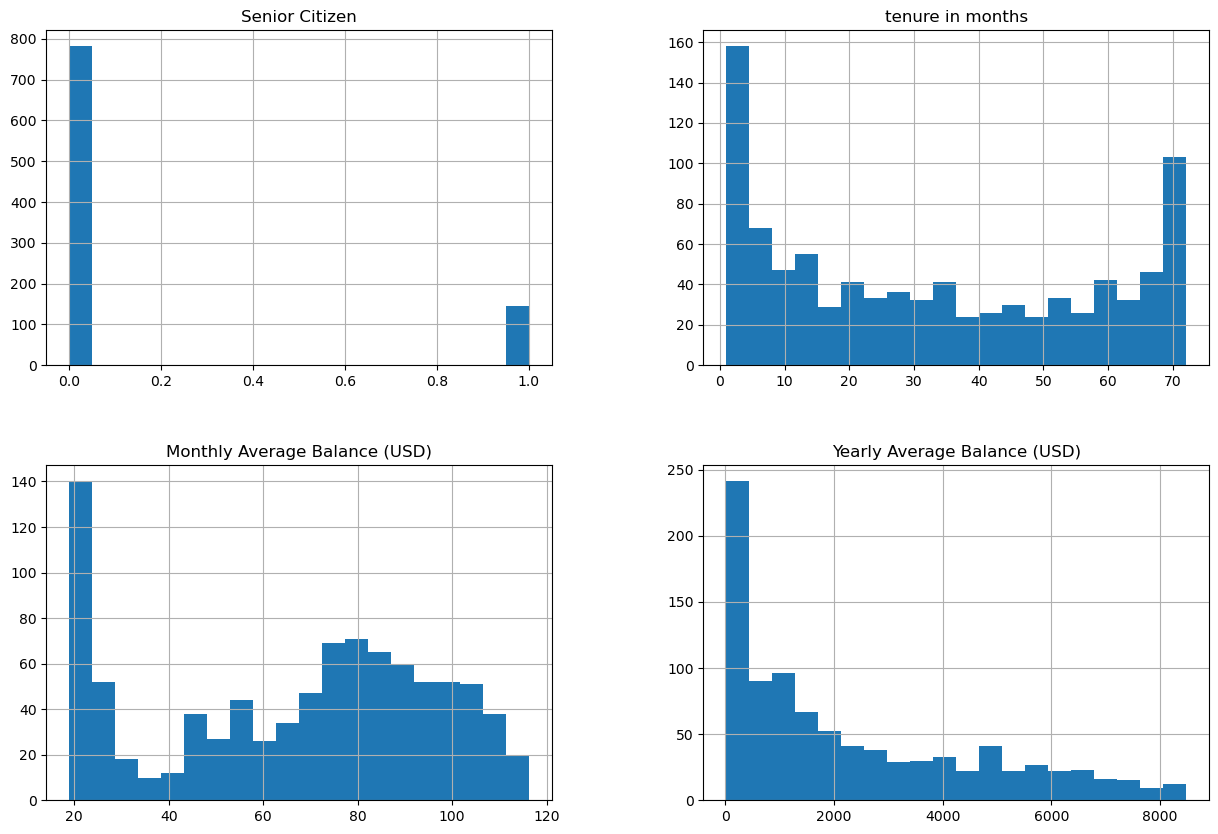

In [287]:
df.hist(bins=20, figsize=(15,10))
plt.show()

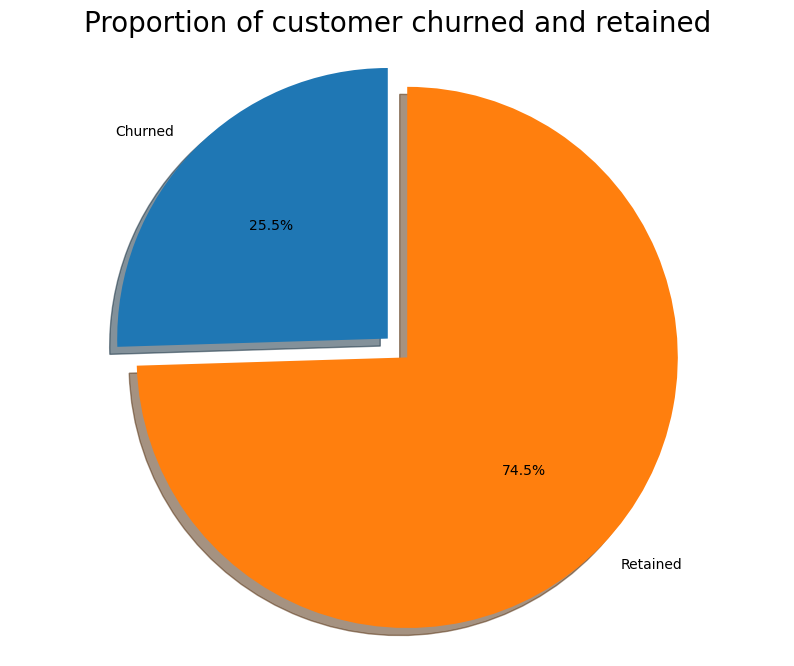

In [288]:
labels = 'Churned', 'Retained'
sizes = [df.Churn[df['Churn']=="Yes"].count(), df.Churn[df['Churn']=="No"].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()



In [289]:
df.head(1)

,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category
0,Male,0,No,Yes,1.0,Yes,No,general loan,No,No,No,No,No,No,Month-to-month,No,44.0,44.0,No,My Credit Card is not generating OTP.,Credit Card


In [290]:
df['Gender'] = df['Gender'].astype(str)
df['Senior Citizen'] = df['Senior Citizen'].astype(str)
df['Marital Status'] = df['Marital Status'].astype(str)
df['Dependents'] = df['Dependents'].astype(str)
df['Priority Account'] = df['Priority Account'].astype(str)
df['Credit Cards'] = df['Credit Cards'].astype(str)
df['Loan Account'] = df['Loan Account'].astype(str)
df['Netbanking'] = df['Netbanking'].astype(str)
df['Debit Card'] = df['Debit Card'].astype(str)
df['MobileApp'] = df['MobileApp'].astype(str)
df['TechSupport Availed'] = df['TechSupport Availed'].astype(str)
df['Zero Balance Account'] = df['Zero Balance Account'].astype(str)
df['FDs'] = df['FDs'].astype(str)
df['Interest Deposited'] = df['Interest Deposited'].astype(str)
df['Paperless Banking'] = df['Paperless Banking'].astype(str)
df['Churn'] = df['Churn'].astype(str)
df['Category'] = df['Category'].astype(str)



df.head()

,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category
0,Male,0,No,Yes,1.0,Yes,No,general loan,No,No,No,No,No,No,Month-to-month,No,44.0,44.00,No,My Credit Card is not generating OTP.,Credit Card
1,Male,0,Yes,Yes,72.0,No,No,general loan,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,64.8,4719.75,No,The Current Account charges are too high.,Current Account
2,Female,1,No,No,20.0,Yes,Yes,top up loan,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,94.1,1782.40,Yes,The loan prepayment charges are too high.,Loans
3,Female,0,No,No,47.0,Yes,Yes,general loan,Yes,No,Yes,Yes,No,No,Two year,Yes,65.0,2879.90,No,The Savings Account opening process was very s...,Savings Account
4,Female,0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,104.1,5645.80,No,The loan documentation process is very complic...,Loans


<Axes: xlabel='Paperless Banking', ylabel='count'>

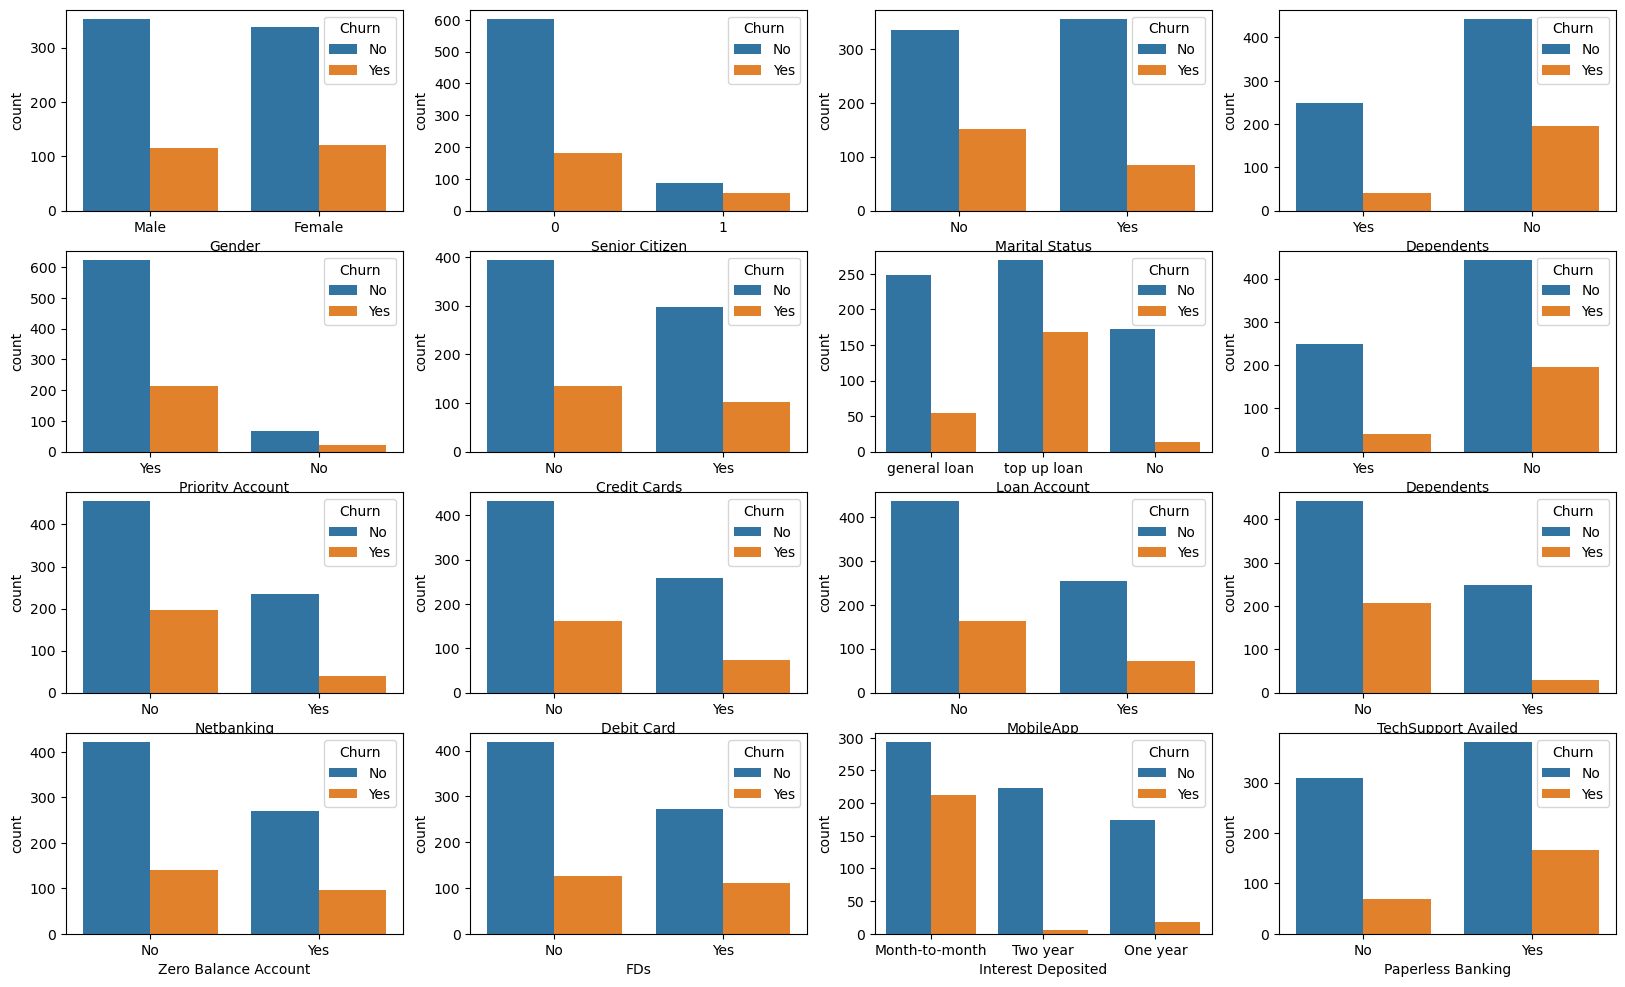

In [291]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(4, 4, figsize=(20, 12))

sns.countplot(x='Gender', hue = 'Churn',data = df, ax=axarr[0][0])
sns.countplot(x='Senior Citizen', hue = 'Churn',data = df, ax=axarr[0][1])
sns.countplot(x='Marital Status', hue = 'Churn',data = df, ax=axarr[0][2])
sns.countplot(x='Dependents', hue = 'Churn',data = df, ax=axarr[0][3])
sns.countplot(x='Priority Account', hue = 'Churn',data = df, ax=axarr[1][0])
sns.countplot(x='Credit Cards', hue = 'Churn',data = df, ax=axarr[1][1])
sns.countplot(x='Loan Account', hue = 'Churn',data = df, ax=axarr[1][2])
sns.countplot(x='Dependents', hue = 'Churn',data = df, ax=axarr[1][3])
sns.countplot(x='Netbanking', hue = 'Churn',data = df, ax=axarr[2][0])
sns.countplot(x='Debit Card', hue = 'Churn',data = df, ax=axarr[2][1])
sns.countplot(x='MobileApp', hue = 'Churn',data = df, ax=axarr[2][2])
sns.countplot(x='TechSupport Availed', hue = 'Churn',data = df, ax=axarr[2][3])
sns.countplot(x='Zero Balance Account', hue = 'Churn',data = df, ax=axarr[3][0])
sns.countplot(x='FDs', hue = 'Churn',data = df, ax=axarr[3][1])
sns.countplot(x='Interest Deposited', hue = 'Churn',data = df, ax=axarr[3][2])
sns.countplot(x='Paperless Banking', hue = 'Churn',data = df, ax=axarr[3][3])



<Axes: xlabel='Churn', ylabel='Yearly Average Balance (USD)'>

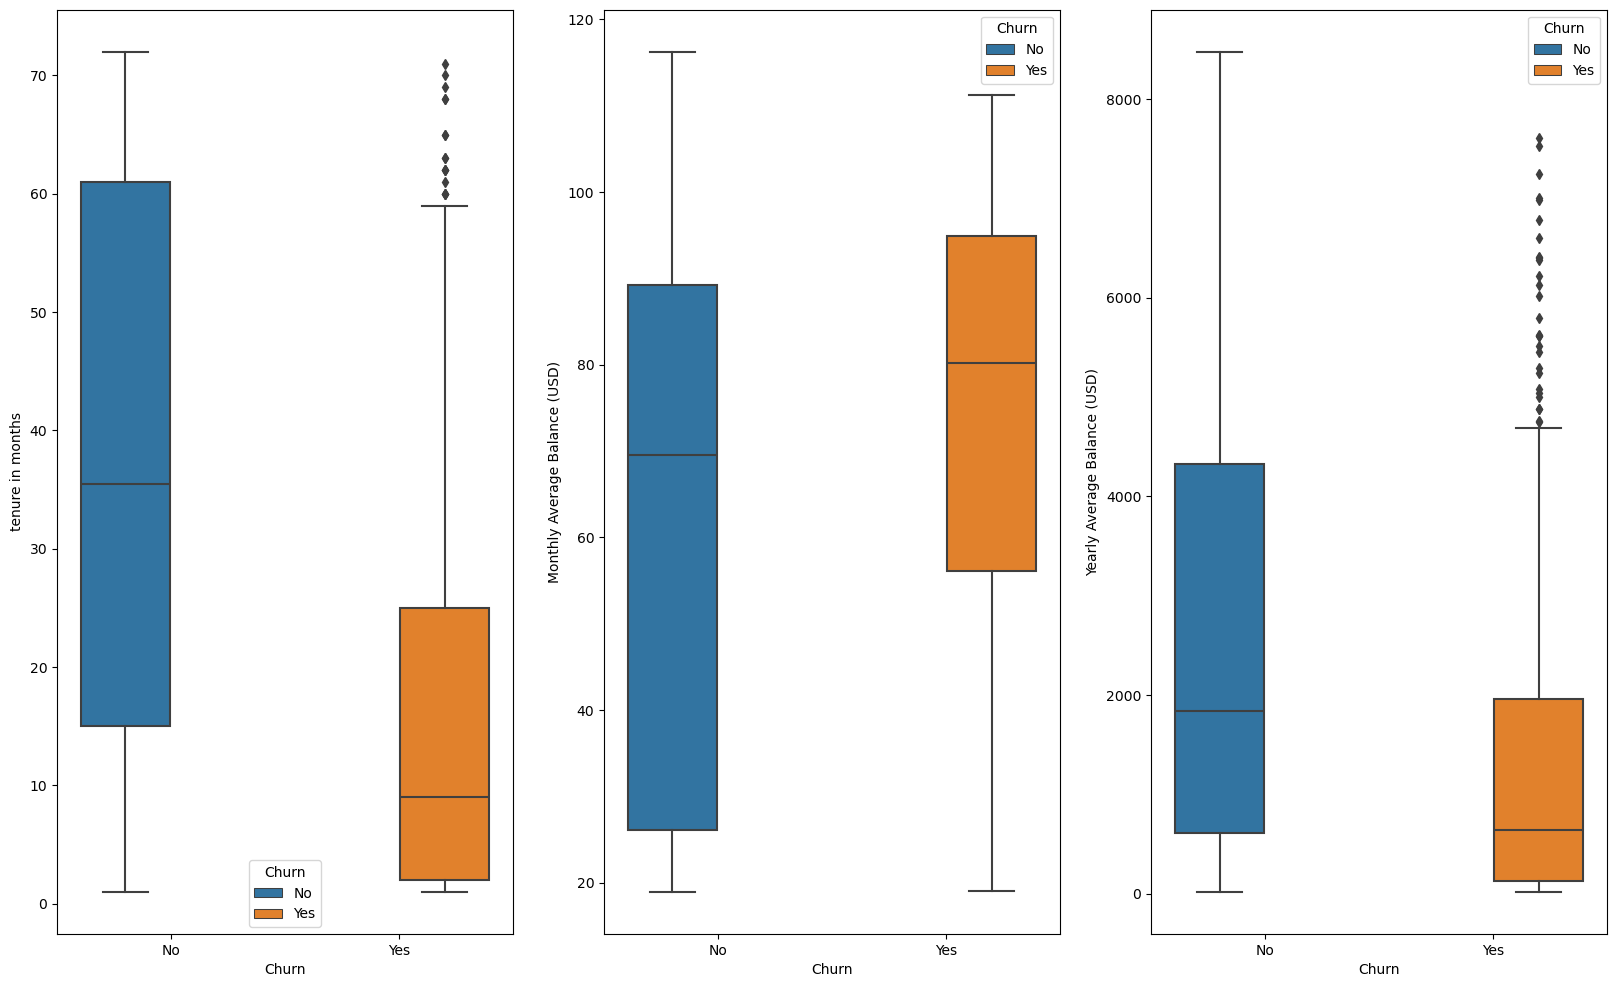

In [292]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(1, 3, figsize=(20, 12))
sns.boxplot(y='tenure in months',x = 'Churn', hue = 'Churn',data = df, ax=axarr[0])
sns.boxplot(y='Monthly Average Balance (USD)',x = 'Churn', hue = 'Churn',data = df , ax=axarr[1])
sns.boxplot(y='Yearly Average Balance (USD)',x = 'Churn', hue = 'Churn',data = df, ax=axarr[2])

In [293]:
df.head()

,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category
0,Male,0,No,Yes,1.0,Yes,No,general loan,No,No,No,No,No,No,Month-to-month,No,44.0,44.00,No,My Credit Card is not generating OTP.,Credit Card
1,Male,0,Yes,Yes,72.0,No,No,general loan,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,64.8,4719.75,No,The Current Account charges are too high.,Current Account
2,Female,1,No,No,20.0,Yes,Yes,top up loan,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,94.1,1782.40,Yes,The loan prepayment charges are too high.,Loans
3,Female,0,No,No,47.0,Yes,Yes,general loan,Yes,No,Yes,Yes,No,No,Two year,Yes,65.0,2879.90,No,The Savings Account opening process was very s...,Savings Account
4,Female,0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,104.1,5645.80,No,The loan documentation process is very complic...,Loans


In [294]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0}).astype(int)

In [295]:
df["Senior Citizen"] = df["Senior Citizen"].map({"1": 1, "0": 0}).astype(int)
df["Marital Status"] = df["Marital Status"].map({"Yes": 1, "No": 0}).astype(int)
df["Dependents"] = df["Dependents"].map({"Yes": 1, "No": 0}).astype(int)
df["Priority Account"] = df["Priority Account"].map({"Yes": 1, "No": 0}).astype(int)
df["Credit Cards"] = df["Credit Cards"].map({"Yes": 1, "No": 0}).astype(int)
df["Netbanking"] = df["Netbanking"].map({"Yes": 1, "No": 0}).astype(int)
df["Debit Card"] = df["Debit Card"].map({"Yes": 1, "No": 0}).astype(int)
df["MobileApp"] = df["MobileApp"].map({"Yes": 1, "No": 0}).astype(int)
df["TechSupport Availed"] = df["TechSupport Availed"].map({"Yes": 1, "No": 0}).astype(int)
df["Zero Balance Account"] = df["Zero Balance Account"].map({"Yes": 1, "No": 0}).astype(int)
df["FDs"] = df["FDs"].map({"Yes": 1, "No": 0}).astype(int)
df["Paperless Banking"] = df["Paperless Banking"].map({"Yes": 1, "No": 0}).astype(int)

In [296]:
df.head(1)

,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category
0,Male,0,0,1,1.0,1,0,general loan,0,0,0,0,0,0,Month-to-month,0,44.0,44.0,0,My Credit Card is not generating OTP.,Credit Card


In [297]:
df = df.drop(["Customer Feedback"], axis=1)
df.head(1)

,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Category
0,Male,0,0,1,1.0,1,0,general loan,0,0,0,0,0,0,Month-to-month,0,44.0,44.0,0,Credit Card


In [298]:
df.head(1)

,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Category
0,Male,0,0,1,1.0,1,0,general loan,0,0,0,0,0,0,Month-to-month,0,44.0,44.0,0,Credit Card


In [299]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

741
185


In [300]:
df_train.head(1)

,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Category
287,Male,0,0,0,14.0,1,0,No,0,0,0,0,0,0,One year,0,20.4,275.7,0,Mobile Banking


In [301]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['tenure in months',  'Monthly Average Balance (USD)', 'Yearly Average Balance (USD)']
cat_vars = ['Gender', 'Senior Citizen','Marital Status', 'Dependents', 'Priority Account', 'Credit Cards', 'Loan Account', 'Netbanking', 'Debit Card', 'MobileApp', 'TechSupport Availed', 'Zero Balance Account', 'FDs', 'Interest Deposited', 'Paperless Banking', 'Category']
df_train = df_train[['Churn'] + continuous_vars + cat_vars]
df_train.head()

,Churn,tenure in months,Monthly Average Balance (USD),Yearly Average Balance (USD),Gender,Senior Citizen,Marital Status,Dependents,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Category
287,0,14.0,20.40,275.70,Male,0,0,0,1,0,No,0,0,0,0,0,0,One year,0,Mobile Banking
767,1,12.0,19.00,233.55,Female,0,1,1,1,0,No,0,0,0,0,0,0,Month-to-month,0,ATM Service
67,1,1.0,85.00,85.00,Female,0,0,0,1,1,top up loan,0,0,0,0,0,1,Month-to-month,1,Loans
458,0,14.0,55.00,771.95,Male,0,0,0,0,0,general loan,0,0,1,1,1,1,Month-to-month,1,Current Account
377,0,56.0,68.75,3808.00,Female,0,1,1,1,1,general loan,1,0,1,0,0,1,One year,1,Credit Cards


In [302]:
df_train.dtypes

Churn                              int32
tenure in months                 float64
Monthly Average Balance (USD)    float64
Yearly Average Balance (USD)     float64
Gender                            object
Senior Citizen                     int32
Marital Status                     int32
Dependents                         int32
Priority Account                   int32
Credit Cards                       int32
Loan Account                      object
Netbanking                         int32
Debit Card                         int32
MobileApp                          int32
TechSupport Availed                int32
Zero Balance Account               int32
FDs                                int32
Interest Deposited                object
Paperless Banking                  int32
Category                          object
dtype: object

In [303]:
df_train.loc[df_train["Senior Citizen"] == 0, 'Senior Citizen'] = -1
df_train.loc[df_train["Marital Status"] == 0, 'Marital Status'] = -1
df_train.loc[df_train["Dependents"] == 0, 'Dependents'] = -1
df_train.loc[df_train["Priority Account"] == 0, 'Priority Account'] = -1
df_train.loc[df_train["Credit Cards"] == 0, 'Credit Cards'] = -1
df_train.loc[df_train["Loan Account"] == 0, 'Loan Account'] = -1
df_train.loc[df_train["Netbanking"] == 0, 'Netbanking'] = -1
df_train.loc[df_train["Debit Card"] == 0, 'Debit Card'] = -1
df_train.loc[df_train["MobileApp"] == 0, 'MobileApp'] = -1
df_train.loc[df_train["TechSupport Availed"] == 0, 'TechSupport Availed'] = -1
df_train.loc[df_train["Zero Balance Account"] == 0, 'Zero Balance Account'] = -1
df_train.loc[df_train["FDs"] == 0, 'FDs'] = -1
df_train.loc[df_train["Paperless Banking"] == 0, 'Paperless Banking'] = -1
df_train.head(1)

,Churn,tenure in months,Monthly Average Balance (USD),Yearly Average Balance (USD),Gender,Senior Citizen,Marital Status,Dependents,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Category
287,0,14.0,20.4,275.7,Male,-1,-1,-1,1,-1,No,-1,-1,-1,-1,-1,-1,One year,-1,Mobile Banking


In [304]:
# One hot encode the categorical variables
lst = ['Gender', 'Loan Account', 'Interest Deposited', 'Category']
remove = list()
for i in lst:
    if (df_train[i].dtype == str or df_train[i].dtype == object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()


,Churn,tenure in months,Monthly Average Balance (USD),Yearly Average Balance (USD),Senior Citizen,Marital Status,Dependents,Priority Account,Credit Cards,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Paperless Banking,Gender_Male,Gender_Female,Loan Account_No,Loan Account_top up loan,Loan Account_general loan,Interest Deposited_One year,Interest Deposited_Month-to-month,Interest Deposited_Two year,Category_Mobile Banking,Category_ATM Service,Category_Loans,Category_Current Account,Category_Credit Cards,Category_Credit Card,Category_Debit Card,Category_Customer Support,Category_Savings Account,Category_General,Category_Debit Cards,Category_Branch Service,Category_Fixed Deposit,Category_Savings,Category_Online Banking,Category_Mobile
287,0,14.0,20.40,275.70,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
767,1,12.0,19.00,233.55,-1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
67,1,1.0,85.00,85.00,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
458,0,14.0,55.00,771.95,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
377,0,56.0,68.75,3808.00,-1,1,1,1,1,1,-1,1,-1,-1,1,1,-1,1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [305]:
# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

,Churn,tenure in months,Monthly Average Balance (USD),Yearly Average Balance (USD),Senior Citizen,Marital Status,Dependents,Priority Account,Credit Cards,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Paperless Banking,Gender_Male,Gender_Female,Loan Account_No,Loan Account_top up loan,Loan Account_general loan,Interest Deposited_One year,Interest Deposited_Month-to-month,Interest Deposited_Two year,Category_Mobile Banking,Category_ATM Service,Category_Loans,Category_Current Account,Category_Credit Cards,Category_Credit Card,Category_Debit Card,Category_Customer Support,Category_Savings Account,Category_General,Category_Debit Cards,Category_Branch Service,Category_Fixed Deposit,Category_Savings,Category_Online Banking,Category_Mobile
287,0,0.183099,0.014396,0.030335,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
767,1,0.154930,0.000000,0.025351,-1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
67,1,0.000000,0.678663,0.007786,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
458,0,0.183099,0.370180,0.089011,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
377,0,0.774648,0.511568,0.447995,-1,1,1,1,1,1,-1,1,-1,-1,1,1,-1,1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [306]:
# data prep pipeline for test data
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Reorder the columns
    continuous_vars = ['tenure in months',  'Monthly Average Balance (USD)', 'Yearly Average Balance (USD)']
    cat_vars = ['Gender', 'Senior Citizen','Marital Status', 'Dependents', 'Priority Account', 'Credit Cards', 'Loan Account', 'Netbanking', 'Debit Card', 'MobileApp', 'TechSupport Availed', 'Zero Balance Account', 'FDs', 'Interest Deposited', 'Paperless Banking', 'Category']
    df_predict = df_predict[['Churn'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict["Senior Citizen"] == 0, 'Senior Citizen'] = -1
    df_predict.loc[df_predict["Marital Status"] == 0, 'Marital Status'] = -1
    df_predict.loc[df_predict["Dependents"] == 0, 'Dependents'] = -1
    df_predict.loc[df_predict["Priority Account"] == 0, 'Priority Account'] = -1
    df_predict.loc[df_predict["Credit Cards"] == 0, 'Credit Cards'] = -1
    df_predict.loc[df_predict["Loan Account"] == 0, 'Loan Account'] = -1
    df_predict.loc[df_predict["Netbanking"] == 0, 'Netbanking'] = -1
    df_predict.loc[df_predict["Debit Card"] == 0, 'Debit Card'] = -1
    df_predict.loc[df_predict["MobileApp"] == 0, 'MobileApp'] = -1
    df_predict.loc[df_predict["TechSupport Availed"] == 0, 'TechSupport Availed'] = -1
    df_predict.loc[df_predict["Zero Balance Account"] == 0, 'Zero Balance Account'] = -1
    df_predict.loc[df_predict["FDs"] == 0, 'FDs'] = -1
    df_predict.loc[df_predict["Paperless Banking"] == 0, 'Paperless Banking'] = -1
    
    # One hot encode the categorical variables
    lst = ['Gender', 'Loan Account', 'Interest Deposited', 'Category']
    remove = list()
    for i in lst:
     # if (df_train[i].dtype == str or df_train[i].dtype == object):
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)

    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
    # MinMax scaling coontinuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

In [307]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [308]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [309]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [500, 1000], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)
best_model(log_primal_Grid)

0.8163963963963964
{'C': 0.5, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 500, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.5, max_iter=500, tol=1e-05)


In [310]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Churn'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,df_train.Churn)
best_model(log_pol2_Grid)

0.8002630146925448
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=0.1, max_iter=300, solver='liblinear')


In [311]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)
best_model(SVM_grid)

0.8164642375168691
{'C': 150, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True}
SVC(C=150, gamma=0.001, probability=True)


In [312]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)
best_model(SVM_grid)

0.8178137651821862
{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly', 'probability': True}
SVC(C=10, degree=2, gamma=0.01, kernel='poly', probability=True)


In [313]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)
best_model(RanFor_grid)

0.8352893161617996
{'max_depth': 7, 'max_features': 8, 'min_samples_split': 3, 'n_estimators': 50}
RandomForestClassifier(max_depth=7, max_features=8, min_samples_split=3,
                       n_estimators=50)


In [314]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)
best_model(xgb_grid)

0.8244785053509887
{'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [316]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)

LogisticRegression(C=100, max_iter=250, tol=1e-05)

In [317]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Churn'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df_train.Churn)

LogisticRegression(C=10, max_iter=300, solver='liblinear')

In [318]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)

SVC(C=100, gamma=0.1, probability=True)

In [319]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df_train.loc[:, df_train.columns != 'Churn'],df_train.Churn)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [322]:
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest classifier
RF = RandomForestClassifier(
    bootstrap=True,
    class_weight=None,
    criterion='gini',
    max_depth=8,
    max_features=6,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,  # Correct parameter
    min_samples_leaf=1,
    min_samples_split=3,
    min_weight_fraction_leaf=0.0,
    n_estimators=50,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)

# Train the model
RF.fit(df_train.loc[:, df_train.columns != 'Churn'], df_train['Churn'])


RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

In [323]:
from xgboost import XGBClassifier

# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bytree=1,
    gamma=0.01,
    learning_rate=0.1,
    max_delta_step=0,
    max_depth=7,
    min_child_weight=5,
    missing=None,
    n_estimators=20,
    n_jobs=1,
    objective='binary:logistic',
    random_state=0,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=1
)

# Train the model
XGB.fit(df_train.loc[:, df_train.columns != 'Churn'], df_train['Churn'])


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=7, max_leaves=None, min_child_weight=5, missing=None,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=1, num_parallel_tree=None, random_state=0, ...)

In [324]:
print(classification_report(df_train.Churn, log_primal.predict(df_train.loc[:, df_train.columns != 'Churn'])))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       551
           1       0.71      0.64      0.67       190

    accuracy                           0.84       741
   macro avg       0.79      0.77      0.78       741
weighted avg       0.84      0.84      0.84       741



In [325]:
print(classification_report(df_train.Churn,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       551
           1       0.98      0.99      0.99       190

    accuracy                           0.99       741
   macro avg       0.99      0.99      0.99       741
weighted avg       0.99      0.99      0.99       741



In [326]:
print(classification_report(df_train.Churn,  SVM_RBF.predict(df_train.loc[:, df_train.columns != 'Churn'])))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       551
           1       0.98      1.00      0.99       190

    accuracy                           0.99       741
   macro avg       0.99      1.00      0.99       741
weighted avg       0.99      0.99      0.99       741



In [327]:
print(classification_report(df_train.Churn,  SVM_POL.predict(df_train.loc[:, df_train.columns != 'Churn'])))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       551
           1       0.98      0.99      0.99       190

    accuracy                           0.99       741
   macro avg       0.99      0.99      0.99       741
weighted avg       0.99      0.99      0.99       741



In [328]:
print(classification_report(df_train.Churn,  RF.predict(df_train.loc[:, df_train.columns != 'Churn'])))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       551
           1       0.92      0.76      0.83       190

    accuracy                           0.92       741
   macro avg       0.92      0.87      0.89       741
weighted avg       0.92      0.92      0.92       741



In [334]:
y = df_train.Churn
X = df_train.loc[:, df_train.columns != 'Churn']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
# auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

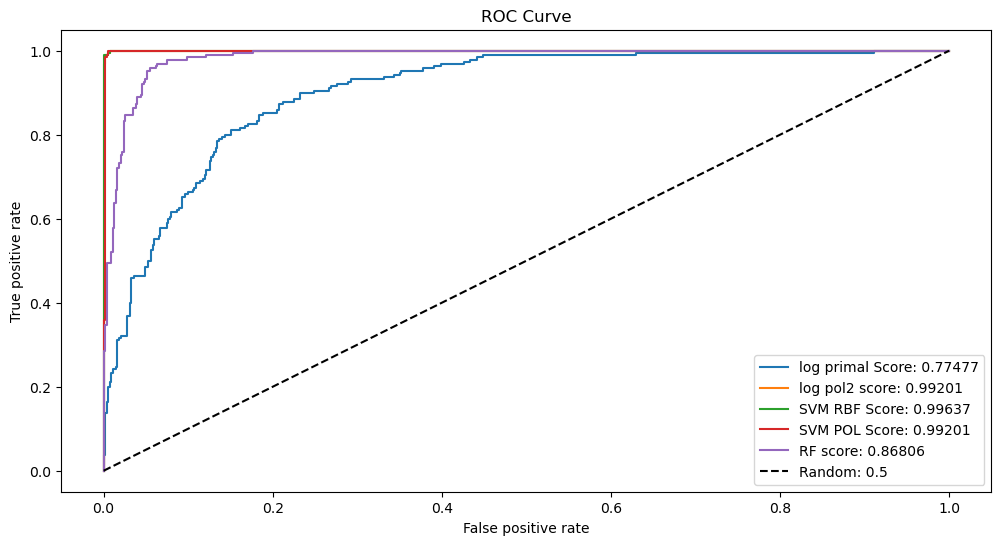

In [336]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
# plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [337]:
# Make the data transformation for test data
df_test = DfPrepPipeline(df_test,df_train.columns,minVec,maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.shape

C:\Users\HP\AppData\Local\Temp\ipykernel_53288\1693366455.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
C:\Users\HP\AppData\Local\Temp\ipykernel_53288\1693366455.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
C:\Users\HP\AppData\Local\Temp\ipykernel_53288\1693366455.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

(185, 40)

In [338]:
print(classification_report(df_test.Churn,  RF.predict(df_test.loc[:, df_test.columns != 'Churn'])))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       139
           1       0.78      0.63      0.70        46

    accuracy                           0.86       185
   macro avg       0.83      0.79      0.81       185
weighted avg       0.86      0.86      0.86       185



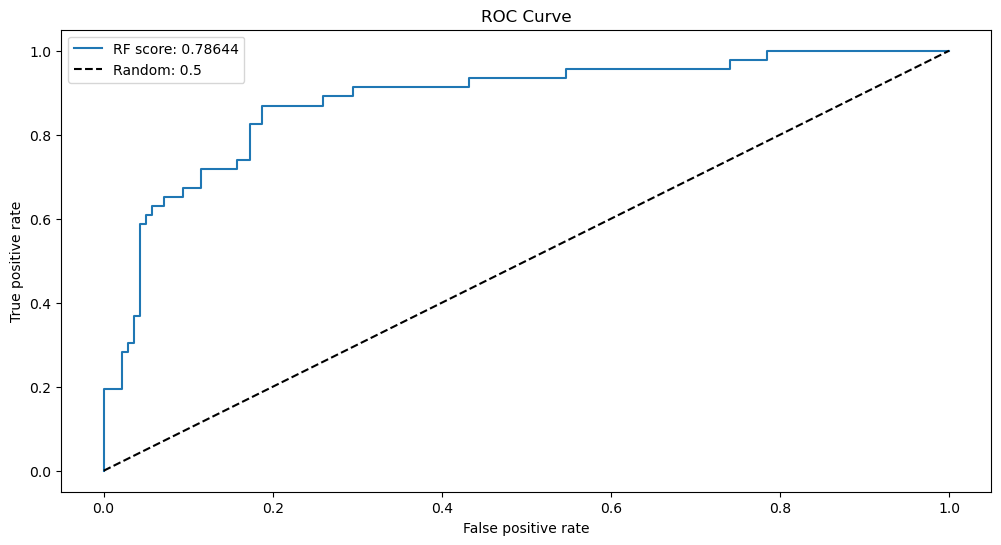

In [340]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(df_test.Churn, RF.predict(df_test.loc[:, df_test.columns != 'Churn']),
                                                       RF.predict_proba(df_test.loc[:, df_test.columns != 'Churn'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()
